<a href="https://colab.research.google.com/github/AimjGuytidy/pytorch-on/blob/main/ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple ML Algo for Classification

### Implementing a perceptron learning algorithm

In [1]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self,lr=0.01,n_iter = 50,random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale = 0.01,size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.lr*(target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_
  def predict(self,X):
    return np.where(self.n_input(X) >= 0.0,1,0)

### Training a perceptron model on the Iris dataset

The perceptron model we created is a binary classifier model!! however it can be extended to a One versus All method!!

In [3]:
import os
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine"\
      "-learning-databases/iris/iris.data"
print("From URL:",url)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
df = pd.read_csv(url,header=None,encoding = "utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [9]:
import matplotlib.pyplot as plt

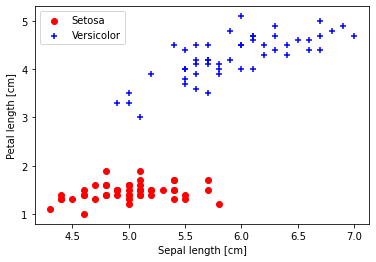

In [10]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y=="Iris-setosa",0,1)
plt.scatter(X[:50,0],X[:50,1],color="red",marker = "o",
            label = "Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color = "blue",
            marker = "+",label = "Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc=0)
plt.show()

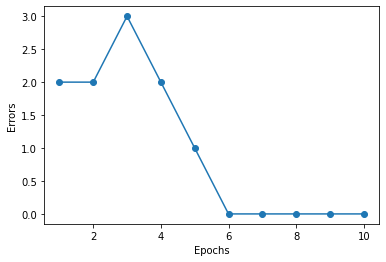

In [11]:
ppn = Perceptron(lr = .1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_,marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X,y,classifier,resolution = 0.02):
  markers = ["o","s","v",">","^"]
  colors = ["red","blue","green","cyan","grey"]
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max = X[:,1].min()-1,X[:1].max()+1

  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,step=resolution),
                        np.arange(x2_min,x2_max,step=resolution))
  lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2,lab,alpha = .3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y = X[y==cl,1],alpha = .8,
                c = colors[idx],
                marker = markers[idx],
                label = f"class {cl}",
                edgecolor = "black")

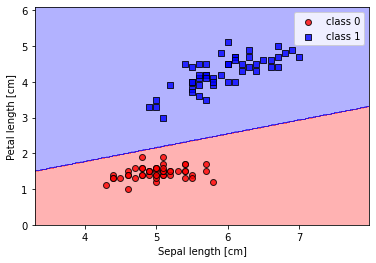

In [14]:
plot_decision_regions(X,y,ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc = 0)
plt.show()

### Adaptive linear neurons and the convergence of learning

Adaline: Adaptive Linear Neuron 🥰 <b/>

The Adaline algorithm illustrates th key concepts of defining and minimizing continuous loss functions.
The key difference between the Adaline rule and perceptron is that the weights are updated based on a linear activation function rather than a unit step function of the net input. so that σ(z) = z.

#### Minimizing loss functions with gradient descent

For Adaline, the loss function L, is defined as the <b>mean squared error (MSE)</b> between the calculated outcome and the true class label:
$$L(w,b) = \frac{1}{2n}∑^{n}_{i = 1}(y^i - σ(z^i))^2$$
given that our loss function is convex we can use <b>gradient descent</b> to find the weights that minimize our loss function.<br>
$w:= w + Δw, b := b + Δb$ <br>
$Δw = -ηΔ_{w}L(w,b), Δb = -ηΔ_{b}L(w,b)$


#### Implementing Adaline in Python